# Financial Data In Reinforcement Learning Context

## What we have ?

* Real Data : 1 minute bars from selected ETFS
* Simulated Data:  1 minute bars from simulated assets

In [1]:
from lib.Environment import DeepTradingEnvironment
import datetime 
# parameters related to the transformation of data, this parameters govern an step before the algorithm
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window": datetime.timedelta(minutes=10),
                   "state_type":"in_window_out_window"}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001}
print("===Meta Parameters===")
print(meta_parameters)
print("===Objective Parameters===")
print(objective_parameters)




===Meta Parameters===
{'in_bars_count': 30, 'out_reward_window': datetime.timedelta(seconds=600), 'state_type': 'in_window_out_window'}
===Objective Parameters===
{'percent_commission': 0.001}


(<AxesSubplot:title={'center':'Real World Data'}, xlabel='time'>,)

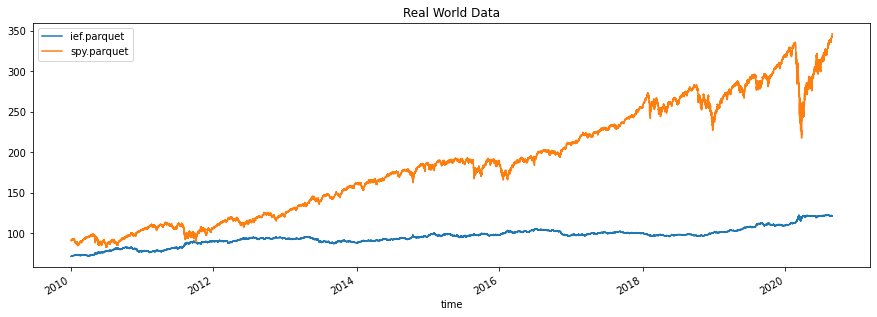

In [8]:
env=DeepTradingEnvironment.build_environment_from_dirs_and_transform(meta_parameters=meta_parameters,
                                                                     data_hash="real_wordl_test",
                                                                     objective_parameters=objective_parameters)
env.assets_prices.plot(figsize=(15,5),title="Real World Data"),

(<AxesSubplot:title={'center':'Simulated Data'}>,)

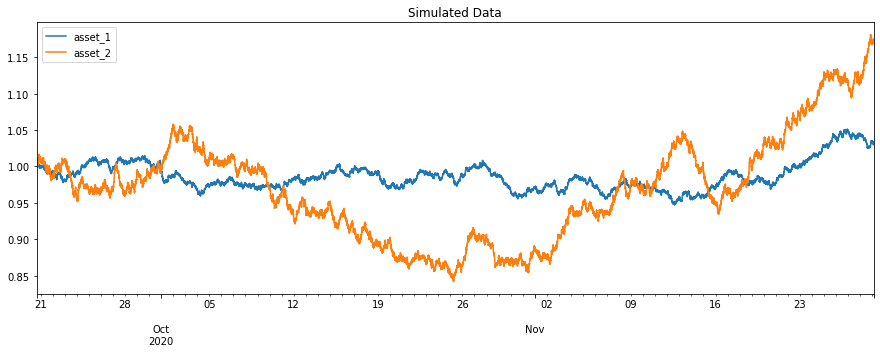

In [10]:

assets_simulation_details={"asset_1":{"method":"GBM","sigma":.1,"mean":.1},
                    "asset_2":{"method":"GBM","sigma":.2,"mean":.2}}

env_2=DeepTradingEnvironment.build_environment_from_simulated_assets(assets_simulation_details=assets_simulation_details,data_hash="simulation_gbm",
                                                                     meta_parameters=meta_parameters,objective_parameters=objective_parameters)

env_2.assets_prices.plot(figsize=(15,5),title="Simulated Data"),

## What we want?

We want to build an automated "Agent" that behaves as a portfolio manager. 

## What do we need?

We need to shape this data into a Reinforcement Learning Framework to train our Agent

1. We need to define an  environment that holds all the available data for training or testing.
2. **We need to define an  state that holds the previous decisions of the agent ( the weights of the portfolio), provides to the agent with the information at this time and the change of state given an action
3. We need to define an agent that takes actiona on the data provided. 





## What does this means from data perspective?

### State Data

It means a progamatically description of an state. All the algorithms that we will try optimize the decisions of the agent given an state. 

So to transform our data in to states we have the following parameters:

* in_bars_count: number of bars that will constitute our state. (if our frequency is 1 minute and in_bars_count=30, then we will use information from the last 30 minutes)
* out_reward_window : the time frame that we will use  as measurement  after an action 
* feature_map: an historical set of features that will feed the model according to "in_bars_count"

Lets look at an example ( just for clarity we will assume that our input_features are the same prices)
```
meta_parameters = {"in_bars_count": 30,
                   "out_reward_window": datetime.timedelta(minutes=10),
                   "state_type":"in_window_out_window"}

# parameters that are related to the objective/reward function construction
objective_parameters = {"percent_commission": .001}

```

<AxesSubplot:title={'center':'State on date'}, xlabel='time'>

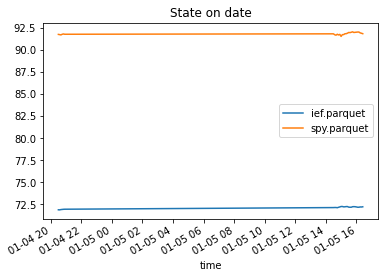

In [16]:

date=env.assets_prices.index[100]
state_features, weights_on_date =env.state.get_state_on_date(target_date=date)
state_features.plot(title="State on date")


In [17]:
weights_on_date.head()

ief.parquet    0.5
spy.parquet    0.5
Name: 2010-01-05 16:25:00+00:00, dtype: float64

One dimension continuos action

$$
\pi(a|s,\theta)=\frac{1}{\sigma(s,\theta)\sqrt{2\pi}}exp(-\frac{(a-\mu(s,\theta))^2}{2\sigma(s,\theta)})
$$

We parametrize mu as we pleased. Simples parametrization

$$
\mu(s,\theta)=\theta_{\mu}^Tx(s)
$$

$$
\sigma(s,\theta)=exp(\theta_{\sigma}^Tx(s))
$$

Now 

$$
\theta=[\theta_{\mu},\theta_{\sigma}]
$$


Initialize variance to be large to have explorations

# NEXT STEPS
### Algorithm  REINFORCE


#### State

State contains historical features on the time window as well as the latest weights. 

#### Meta parameters

* in_window:  number of previous observations that each state will include for example if data is in intervals of 10 minutes and in_window=20 then will be 200 minutes time frame.
* forecast_window: time frame for the action to wait for the reward
* episode_length: the number of samples of  states for each episode. On each update it doesnt make sense to run continous time windows. Specially because our states will be heavily correlated.  We can also see this as the size of the batch if we use a neural network




#### Pseudo-Code:

Loop forever ( for each episode):

    (episode_index_sample)Take a random sample of size episode_length on all the dates in the training sample
    {We can test with non continuos and continuos batches}
    Generate an episode S0,A0,R1 ..... (To generate A0 use policy sampling
    Save actions to weights buffer
    loop[ for each step of episode t=0,,T-1]
        
        calculate reward if not continous then G shouldnt be discounted
        
        
    
    
    

**Example**
in_window=10
forecast_window=10 minutes
episode_lenght=200

```
episode_index_sample=[11,45,...,100]
S0=data[11-10:11]
A0=[,1,.2...,7]
R=log_return from data[11:+10_minutes]
```





In [41]:
vol=.20/np.sqrt(252)
alpha=.06
beta=.92

w=vol*vol*(1-alpha-beta)





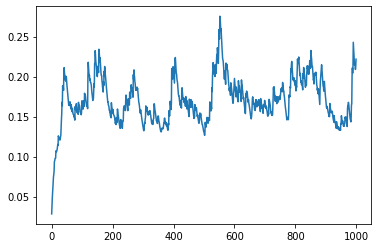

In [96]:
obs=1000
variances=[]
noises=[]
for i in range(obs):
    
    
    if i>0:
        noises.append(np.random.normal(loc=0,scale=np.sqrt(variances[i-1])))
        v=w+alpha*(noises[i-1]**2)+beta*variances[i-1]
    else:
        v=w
    
    variances.append(v)
    
    

vols=[np.sqrt(i)*np.sqrt(252) for i in variances]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(vols)

In [81]:
np.random.normal(loc=0,scale=np.sqrt(variances[0]))

-0.0016952756970561908

In [137]:
T=(1/252)
sigma=.2
mean=.05
vol = sigma * np.sqrt(T)
alpha = .06
beta = .92
w = vol * vol * (1 - alpha - beta)

variances = []
noises = []
returns=[]
for i in range(1000):

    if i > 0:
        noises.append(np.random.normal(loc=0, scale=np.sqrt(variances[i - 1])))
        v = w + alpha * (noises[i - 1] ** 2) + beta * variances[i - 1]
    else:
        v = w

    variances.append(v)
    r=np.exp((mean - 0.5 * variances[i]) * T +np.sqrt(variances[i])*np.random.standard_normal(1))
    returns.append(r)

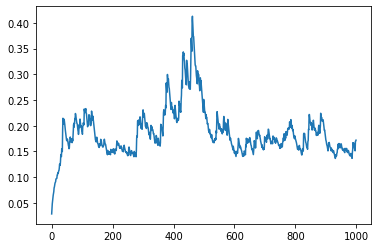

In [138]:
vols=[np.sqrt(i)*np.sqrt(252) for i in variances]
import matplotlib.pyplot as plt
%matplotlib inline
plt.plot(vols)

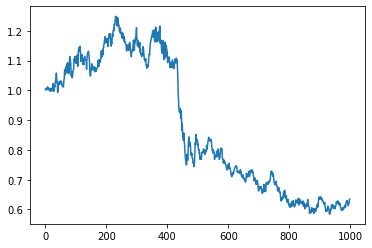

In [141]:
plt.plot(np.array(returns).cumprod())

In [143]:
asset=np.array(returns).cumprod()

In [144]:
np.stdnp.log(asset)

array([ 0.00345638,  0.00099405,  0.00682662,  0.00630409,  0.00430637,
        0.00381201,  0.00931732,  0.01171168,  0.00770532,  0.00282487,
        0.00760678,  0.00850042,  0.00174757,  0.00525787,  0.00076267,
        0.00597157, -0.00264099,  0.00263609,  0.00294655,  0.00671105,
        0.00267327, -0.00186056,  0.00571005,  0.00681596,  0.01253273,
        0.02255417,  0.0103525 , -0.00362375,  0.00437653,  0.00627535,
        0.01479941,  0.01106796,  0.02269069,  0.02969696,  0.03613902,
        0.04441221,  0.05646522,  0.04310021,  0.0257256 ,  0.02616633,
       -0.00672944, -0.00452121,  0.0117569 ,  0.02624175,  0.01922755,
        0.02308543,  0.02910203,  0.02173725,  0.02812959,  0.03144246,
        0.02437398,  0.02199406,  0.03011374,  0.02878204,  0.02011702,
        0.01734879,  0.01309713,  0.01884674,  0.01453965,  0.01126159,
        0.0231513 ,  0.03536167,  0.04003645,  0.06765398,  0.06036609,
        0.05168803,  0.05667529,  0.07659621,  0.06681229,  0.05